<a href="https://colab.research.google.com/github/Parinita-Jain/ML_LectureNotes/blob/main/K_Mean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**inertia** : In K-Mean clustering inertia is calculated by summing up the squared distance between each data point and its assigned clusters centroid. The goal is to minimise the sum indicating tight and compact clusters

Cluster1 : (2,3) (3,3) (5,6)

Cluster2: (9,8),(10,8),(10,10)



Centroid1 : (3.33,4)
Centroid2 : (9.6,8.6)

= (2-3.33)^2 + (3-4)^2 + (3-3.33)^2 + (3-4)^2 + (5-3.33)^2 + (6-4)^2

==> 10.64

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
x = df.iloc[:,[3,4]]

In [ ]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


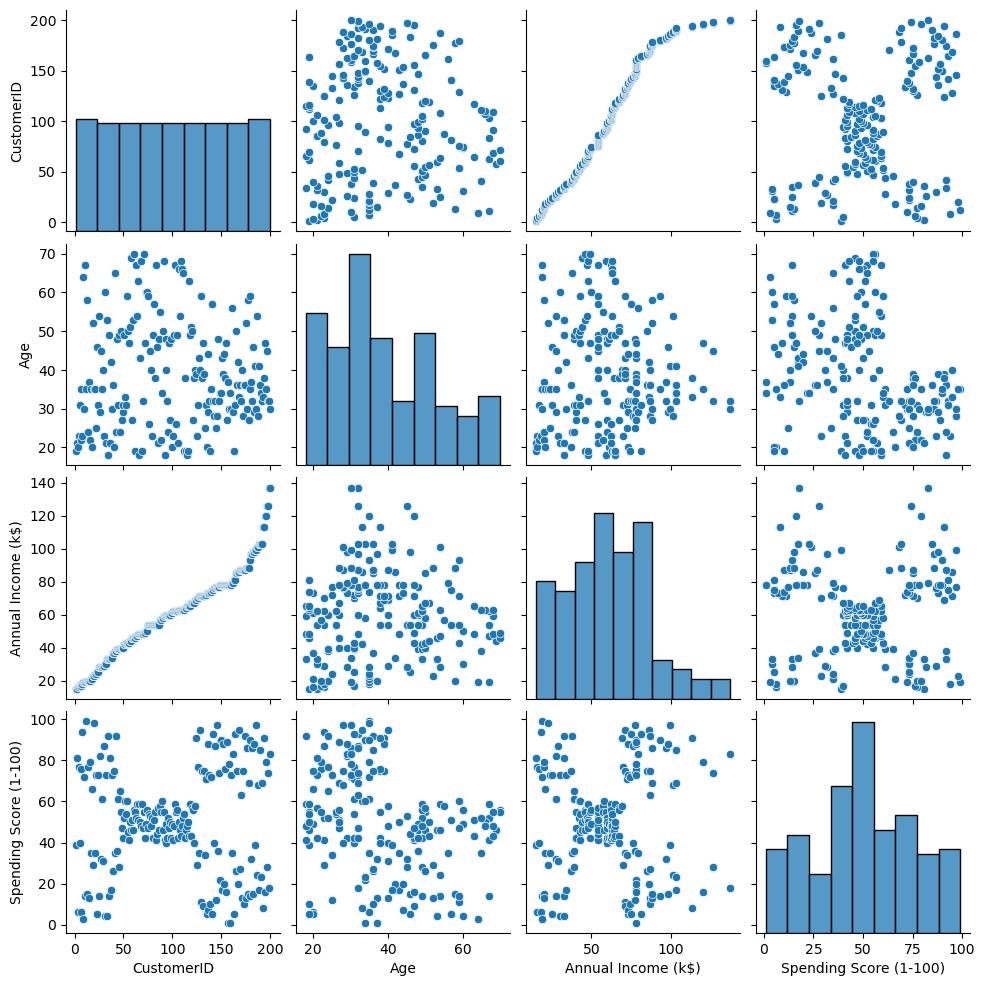

In [ ]:
sns.pairplot(df)

In [ ]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
x_new = sc.fit_transform(x)

In [ ]:
x_new

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_new)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

[400.0,
 269.69101219276394,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.057348270386,
 44.86475569922557,
 37.18175782682131,
 32.448651348336334,
 29.090568897369714]

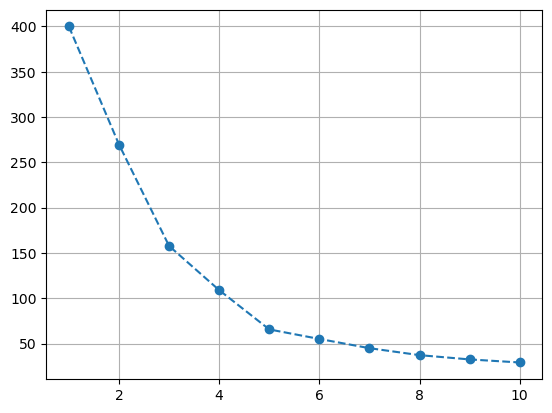

In [ ]:
plt.plot(range(1,11),wcss,'o--')
plt.grid()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5,random_state=1)
ylabel = kmeans.fit_predict(x_new)

In [ ]:
ylabel

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [ ]:
df['Ylabel'] = ylabel

In [ ]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Ylabel
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


In [ ]:
kmeans.cluster_centers_

array([[-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.30751869, -1.13696536]])

In [ ]:
kmeans.cluster_centers_[:,1]

array([ 1.13217788, -1.28443907, -0.02645617,  1.23950275, -1.13696536])

In [ ]:
kmeans.cluster_centers_

array([[-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.30751869, -1.13696536]])

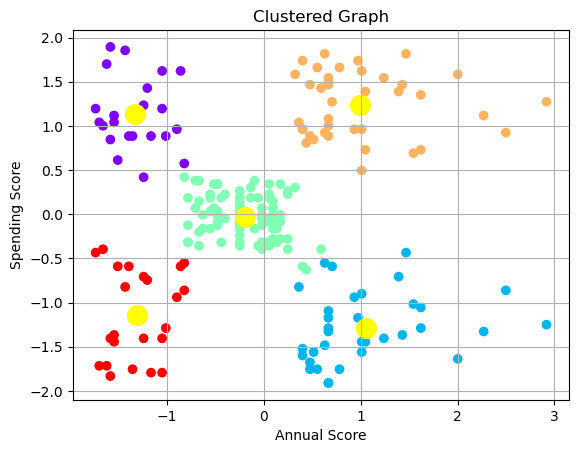

In [ ]:
plt.scatter(x_new[:,0],x_new[:,1],c=ylabel,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='yellow',s=200)
plt.xlabel('Annual Score')
plt.ylabel('Spending Score')
plt.title('Clustered Graph')
plt.grid()
plt.show()

In [ ]:
df[df['Ylabel']==4]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Ylabel
0,1,Male,19,15,39,4
2,3,Female,20,16,6,4
4,5,Female,31,17,40,4
6,7,Female,35,18,6,4
8,9,Male,64,19,3,4
10,11,Male,67,19,14,4
12,13,Female,58,20,15,4
14,15,Male,37,20,13,4
16,17,Female,35,21,35,4
18,19,Male,52,23,29,4


In [ ]:
df[df['Ylabel']==4].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Ylabel
count,23.00000,23.000000,23.000000,23.000000,23.0
mean,23.00000,45.217391,26.304348,20.913043,4.0
std,13.56466,13.228607,7.893811,13.017167,0.0
min,1.00000,19.000000,15.000000,3.000000,4.0
25%,12.00000,35.500000,19.500000,9.500000,4.0
50%,23.00000,46.000000,25.000000,17.000000,4.0
75%,34.00000,53.500000,33.000000,33.500000,4.0
max,45.00000,67.000000,39.000000,40.000000,4.0


In [ ]:
df[df['Ylabel']==0].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Ylabel
count,22.000000,22.000000,22.000000,22.000000,22.0
mean,23.090909,25.272727,25.727273,79.363636,0.0
std,13.147185,5.257030,7.566731,10.504174,0.0
min,2.000000,18.000000,15.000000,61.000000,0.0
25%,12.500000,21.250000,19.250000,73.000000,0.0
50%,23.000000,23.500000,24.500000,77.000000,0.0
75%,33.500000,29.750000,32.250000,85.750000,0.0
max,46.000000,35.000000,39.000000,99.000000,0.0


In [ ]:
df[df['Ylabel']==4].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Ylabel
count,23.00000,23.000000,23.000000,23.000000,23.0
mean,23.00000,45.217391,26.304348,20.913043,4.0
std,13.56466,13.228607,7.893811,13.017167,0.0
min,1.00000,19.000000,15.000000,3.000000,4.0
25%,12.00000,35.500000,19.500000,9.500000,4.0
50%,23.00000,46.000000,25.000000,17.000000,4.0
75%,34.00000,53.500000,33.000000,33.500000,4.0
max,45.00000,67.000000,39.000000,40.000000,4.0


0  -- Purple

1 -- Blue

2 --  Green

3  -- Orange

4 -- Red